# <p style="text-align: center;">Long Short Term Memory (LSTM) example in Keras <br>for predicting time series
</p>

<p style="text-align: center;">
 by Prof. Dr.-Ing. Jürgen Brauer, http://www.juergenbrauer.org
</p>

# Table of Contents

1. Load the training and test data
2. Display some of the training data
3. Display some of the test data
4. Output format to submit for the competition
5. Extract a single time series
6. Display the extracted sales time series of a single store

## 1. Load the training and test data

Dataset is from Kaggle:
https://www.kaggle.com/c/rossmann-store-sales/data

In [40]:
import pandas as pd
train_data = pd.read_csv("rossmann_dataset/train.csv")
test_data  = pd.read_csv("rossmann_dataset/test.csv")

C:\Users\Juergen Brauer\AppData\Local\conda\conda\envs\env_mss\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. Display some of the training data

Let's first get a feeling for the training data:

In [41]:
print("train_data has shape", train_data.shape)
train_data.head(10)

train_data has shape (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


The "Sales" column in the dataset is the turnover that was made at a specific day in a specific store.

Here is more information on the data from the Kaggle competition website:
    
    Id - an Id that represents a (Store, Date) duple within the test set
    
    Store - a unique Id for each store
    
    Sales - the turnover for any given day (this is what you are predicting)
    
    Customers - the number of customers on a given day
    
    Open - an indicator for whether the store was open: 0 = closed, 1 = open
    
    StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
    
    SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
    

## 3. Display some of the test data

Now let us get a feeling for the test data:

In [42]:
print("test_data has shape", test_data.shape)
test_data.head(10)

test_data has shape (41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


There are 41088 rows for which we have to predict the sales. Note that the "Sales" and "Customers" columns are missing!

So given a certain "Store" id and additional information as "DayOfWeek", "Data", "Open", "Promo", "StateHoliday" and "SchoolHoliday" we have to predict the sales / turnover for this store.

Note, that there are some stores "missing" in the test table (e.g., stores with ID 2,4,5,6). So for these stores we are not expected to give predictions.

## 4. Output format to submit for the competition

If you have a look at sample_submission.csv you will see that we are expected to give predictions for each of the 41088 rows:

In [43]:
sample_submission = pd.read_csv("rossmann_dataset/sample_submission.csv")
print("sample_submission has shape", sample_submission.shape)
sample_submission.head(10)

sample_submission has shape (41088, 2)


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


## 5. Extract a single time series

Now let us extract the sales time series for a single store from the training data.

In [44]:
train_data_store1 = train_data[train_data.Store == 1]
print("train_data_store1 has shape", train_data_store1.shape)
train_data_store1.head(10)

train_data_store1 has shape (942, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
5575,1,7,2015-07-26,0,0,0,0,0,0
6690,1,6,2015-07-25,4364,500,1,0,0,0
7805,1,5,2015-07-24,3706,459,1,0,0,0
8920,1,4,2015-07-23,3769,503,1,0,0,0
10035,1,3,2015-07-22,3464,463,1,0,0,0


Mmmhhh... The resulting data is in reverse time order when looking at the date. Let's sort the table according to the date:

In [45]:
train_data_store1.sort_values(by=['Date'], inplace=True, ascending=True)
train_data_store1.head(15)

C:\Users\Juergen Brauer\AppData\Local\conda\conda\envs\env_mss\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1010520,1,7,2013-01-06,0,0,0,0,0,1
1009405,1,1,2013-01-07,7176,785,1,1,0,1
1008290,1,2,2013-01-08,5580,654,1,1,0,1
1007175,1,3,2013-01-09,5471,626,1,1,0,1
1006060,1,4,2013-01-10,4892,615,1,1,0,1


In [46]:
dates = train_data_store1["Date"].values
sales = train_data_store1["Sales"].values
print("shape of dates is", dates.shape)
print("shape of sales is", sales.shape)

shape of dates is (942,)
shape of sales is (942,)


## 6. Display the extracted sales time series

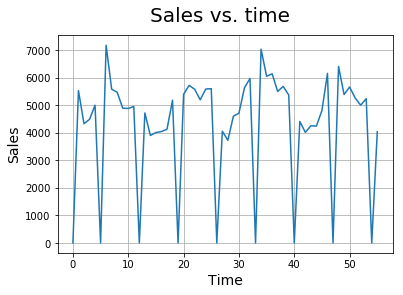

In [47]:
import matplotlib.pyplot as plt

nr_days_twomonths = 7*4 + 7*4

fig = plt.figure("Sales for store 1")
fig.suptitle("Sales vs. time", fontsize=20)
plt.plot(sales[0:nr_days_twomonths])
plt.grid(True)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.show()